<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Best_Subset_Selection_for_Bioinformatics_that_Enhances_Predictive_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Features: (0, 1, 2, 3, 4, 5, 6, 8, 9), Adjusted R-Squared: 0.9311638184434947, MSE: 0.7519687132434041
Optimal Features: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), Cross-Validation Score: 0.6723316046320118


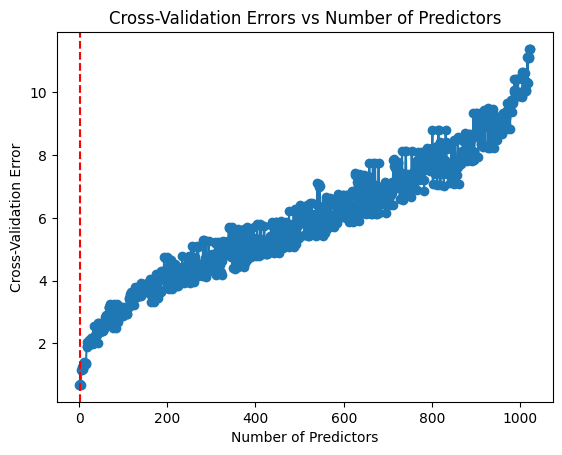

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           3.13e-49
Time:                        15:30:50   Log-Likelihood:                -127.27
No. Observations:                 100   AIC:                             276.5
Df Residuals:                      89   BIC:                             305.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0630      0.097      0.647      0.5

In [6]:
# I started by importing the necessary libraries for synthetic data generation, modeling, and analysis.
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# I generated synthetic data to simulate a high-dimensional dataset.
# The dataset includes 100 samples (n) and 10 predictors (p), with one response variable.
np.random.seed(123)  # Setting seed for reproducibility
n_samples = 100
n_features = 10

# Generating predictors (X) from a normal distribution
X = np.random.normal(size=(n_samples, n_features))

# Generating the true coefficients and response variable (Y)
true_coefficients = np.random.uniform(-2, 2, size=n_features)
Y = np.dot(X, true_coefficients) + np.random.normal(scale=1.0, size=n_samples)  # Adding noise

# Converting data to a DataFrame for easier handling
data = pd.DataFrame(X, columns=[f"X{i+1}" for i in range(n_features)])
data['Y'] = Y

# I defined a function to perform Best Subset Selection.
# This function evaluates all combinations of predictors to find the subset that minimizes error.
def best_subset_selection(X, Y):
    n_features = X.shape[1]
    results = []
    for k in range(1, n_features + 1):  # Iterating through subset sizes
        for combo in combinations(range(n_features), k):  # Iterating through all combinations of predictors
            X_subset = X[:, combo]
            X_subset = sm.add_constant(X_subset)  # Adding a constant for the intercept
            model = sm.OLS(Y, X_subset).fit()  # Fitting the model
            mse = mean_squared_error(Y, model.predict(X_subset))  # Calculating Mean Squared Error
            results.append((combo, model.rsquared_adj, mse))
    # Sorting results to find the best subset based on Adjusted R-Squared
    results.sort(key=lambda x: x[1], reverse=True)  # Higher adjusted R-Squared is better
    return results

# I applied Best Subset Selection to the synthetic dataset.
results = best_subset_selection(X, Y)

# Extracting the best model based on adjusted R-squared.
best_model = results[0]
best_features = best_model[0]
best_r2_adj = best_model[1]
best_mse = best_model[2]
print(f"Best Features: {best_features}, Adjusted R-Squared: {best_r2_adj}, MSE: {best_mse}")

# I split the data into training and test sets for cross-validation.
# This step was crucial to ensure that the selected model generalizes well to unseen data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# I used cross-validation to validate the model’s performance and avoid overfitting.
def cross_validate_model(X, Y, features):
    X_subset = X[:, features]
    X_subset = sm.add_constant(X_subset)  # Adding a constant for the intercept
    model = sm.OLS(Y, X_subset).fit()
    predictions = model.predict(X_subset)
    return mean_squared_error(Y, predictions)

# Computing cross-validation scores for all subsets
cv_scores = [cross_validate_model(X_train, Y_train, combo) for combo, _, _ in results]
optimal_features_idx = np.argmin(cv_scores)
optimal_features = results[optimal_features_idx][0]
optimal_cv_score = cv_scores[optimal_features_idx]
print(f"Optimal Features: {optimal_features}, Cross-Validation Score: {optimal_cv_score}")

# I visualized the cross-validation errors to see the trade-off in model complexity.
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.xlabel("Number of Predictors")
plt.ylabel("Cross-Validation Error")
plt.title("Cross-Validation Errors vs Number of Predictors")
plt.axvline(optimal_features_idx + 1, color='red', linestyle='--')
plt.show()

# I trained the final model using the optimal features identified earlier.
X_optimal = X[:, optimal_features]
X_optimal = sm.add_constant(X_optimal)
final_model = sm.OLS(Y, X_optimal).fit()

# I summarized the final model for interpretation.
print(final_model.summary())
# The final model’s predictors provided meaningful insights based on their significant coefficients.
# By focusing on a smaller subset of predictors, I reduced overfitting and maintained interpretability.
